In [3]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
# generate a sample
s1=0.15
s2=0.10
mu1 = [3, 2]
cov1 = s1*np.identity(2)
mu2 = [1, 0.5]
cov2 = s2*np.identity(2)
mu=np.array([mu1,mu2])
tamaño=100
outliers=np.array([[3,1],[3.2,1.01],[2.9,0.8]])
n_out=np.shape(outliers)[0]
X1 = multivariate_normal.rvs(mu1, cov1, size=tamaño)
X2 = multivariate_normal.rvs(mu2, cov2, size=tamaño)
X=np.vstack([X1,outliers,X2])
Y=np.concatenate((np.zeros(tamaño),np.ones(tamaño+n_out)),axis=0)

#### Using FDA to classificate two Gaussian distribution

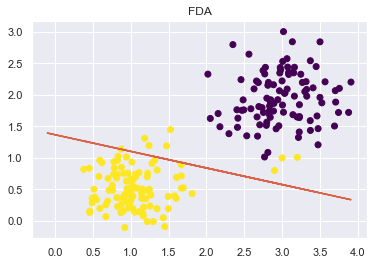

(array([-0.26361518, -0.26670489]), 1.367678163141901)

In [9]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y,sample_weight=None)
beta=reg.coef_
beta_0=reg.intercept_
plt.scatter(X[:,0],X[:,1],c=Y, cmap='viridis')
plt.plot(X,beta_0+X*beta[0] , label = "Regresión",color="#DA6248")
plt.title("FDA")
plt.show()
beta,beta_0

### Using weights to improve the classification in case of outliers

The weights in the least squares regression goes like the inverse of the distance to minimize the impact of outliers

In [10]:
def mahalanobis(x,y,sigma):
    return(np.sqrt(np.transpose(x-y)@np.linalg.inverse(sigma)@(x-y)))

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans=kmeans.fit(X)
labels=kmeans.labels_
cent=kmeans.cluster_centers_
print(mu,cent)
W=[]
for i in range(np.shape(X)[0]):
    W=np.append(W,1/min(np.linalg.norm(cent[0]-X[i]),np.linalg.norm(cent[1]-X[i])))

[[3.  2. ]
 [1.  0.5]] [[1.0196056  0.51723374]
 [2.98894763 1.92236206]]


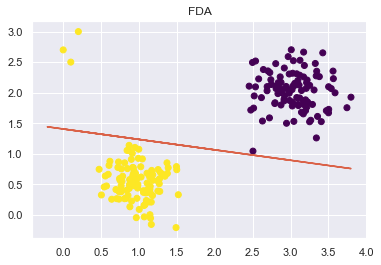

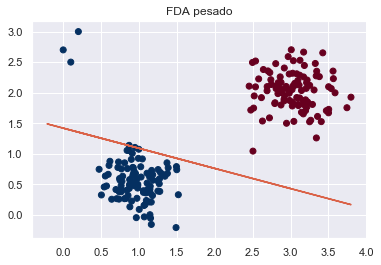

In [23]:
# generate a sample
s1=0.08
s2=0.07
mu1 = [3, 2]
cov1 = s1*np.identity(2)
mu2 = [1, 0.5]
cov2 = s2*np.identity(2)
mu=np.array([mu1,mu2])
tamaño=100
#outliers=np.array([[4,1],[4.2,1.01],[3.9,0.8]])
outliers=np.array([[0.2,3],[0.1,2.5],[0,2.7]])
n_out=np.shape(outliers)[0]
X1 = multivariate_normal.rvs(mu1, cov1, size=tamaño)
X2 = multivariate_normal.rvs(mu2, cov2, size=tamaño)
X=np.vstack([X1,outliers,X2])
Y=np.concatenate((np.zeros(tamaño),np.ones(tamaño+n_out)),axis=0)

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y,sample_weight=None)
beta=reg.coef_
beta_0=reg.intercept_
plt.scatter(X[:,0],X[:,1],c=Y, cmap='viridis')
plt.plot(X,beta_0+X*beta[0] , label = "Regresión",color="#DA6248")
plt.title("FDA")
plt.show()


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans=kmeans.fit(X)
labels=kmeans.labels_
cent=kmeans.cluster_centers_
W=[]
for i in range(np.shape(X)[0]):
    W=np.append(W,1/min(np.linalg.norm(cent[0]-X[i]),np.linalg.norm(cent[1]-X[i])))
    
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,Y,sample_weight=W)
beta=reg.coef_
beta_0=reg.intercept_
plt.scatter(X[:,0],X[:,1],c=Y, cmap='RdBu')
plt.plot(X,beta_0+X*beta[0] , label = "Regresión",color="#DA6248")
plt.title("FDA pesado")
plt.show()
